<a href="https://colab.research.google.com/github/ARKA1112/Astro/blob/main/TESS_FFI_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#!pip install astropy
from astropy.io import fits
import numpy as np
#fits_file = "https://archive.stsci.edu/missions/tess/ffi/s0001/2018/206/4-2/tess2018206192942-s0001-4-2-0120-s_ffic.fits"
fits_file = 'http://hla.stsci.edu/cgi-bin/getdata.cgi?config=ops&download=1&dataset=hst_09857_01_wfpc2_f656n_wf&filename=u8rh0101m_c0m.fits' #hubble space telescope data

In [35]:
fits.info(fits_file)

Filename: /root/.astropy/cache/download/url/9192c250c1f2a2deb10c40dbfa3325da/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     255   ()      
  1  SCI           1 ImageHDU       143   (800, 800)   float32   
  2  SCI           2 ImageHDU       132   (800, 800)   float32   
  3  SCI           3 ImageHDU       132   (800, 800)   float32   
  4  SCI           4 ImageHDU       132   (800, 800)   float32   


In [36]:
#Since WCS is not recognized, we will need to import the WCS library

from astropy.wcs import WCS

In [37]:
with fits.open(fits_file, mode = 'readonly') as hdulist:
  WCS_info = WCS(hdulist[1].header)
  CAL_image = hdulist[1].data
  header = hdulist[1].header

In [ ]:
header

In [32]:
WCS_info

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 37.0588226317988  41.9999999999986  
CRPIX : -11440.5  240.0  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259988e-05  6.94444461259988e-05  
NAXIS : 6320  6284

In [38]:
CAL_image

array([[ 1.41798944e+01, -6.69423065e+01, -5.03087082e+01, ...,
         1.97660141e+01,  2.05437603e+01,  2.71625066e+00],
       [-3.71490288e+01,  3.55615540e+01,  4.96138496e+01, ...,
        -3.07246284e+01,  2.23123035e+01,  2.44029903e+00],
       [ 4.01089239e+00, -8.15290909e+01, -6.74265671e+01, ...,
         2.19339790e+01,  2.06244373e+01,  3.16344047e+00],
       ...,
       [ 3.41555572e+00, -3.46331558e+01, -2.18812733e+01, ...,
         5.36472917e-01,  5.87052643e-01,  1.14759989e-01],
       [-8.67528534e+00,  9.45497990e+00, -2.07824364e+01, ...,
         4.94726539e-01,  5.36182582e-01,  1.18173726e-01],
       [ 3.56806374e+01,  2.12637521e-03,  5.44161453e+01, ...,
        -7.49323273e+01, -6.92003937e+01,  3.80835533e+01]], dtype=float32)

In [58]:
#using the header to find the midpoint of the exposure

midtime = (header['LPKTTIME'] + header['FPKTTIME'])/2
midtime

53099.869521

In [59]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'TESS Calibrated FFI for Sector 1, Camera 4, CCD 2, Timestamp 53099.869521 BTJD')

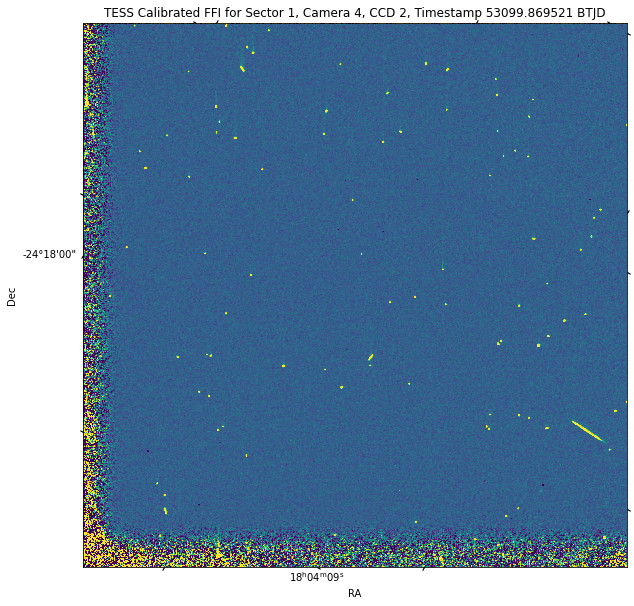

In [86]:
plt.figure(figsize= (10,10))
plt.subplot(111, projection = WCS_info)
plt.imshow(CAL_image, vmin = np.percentile(CAL_image,4),vmax = np.percentile(CAL_image, 98),origin = "lower")
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title("TESS Calibrated FFI for Sector 1, Camera 4, CCD 2, Timestamp %f BTJD" % midtime)


In [87]:
CAL_image.shape

(800, 800)